In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

import pandas as pd
import time

# Retrieve the data from CSVs

In [2]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
Y_test = pd.read_csv('data/Y_test.csv')

X_train_small = pd.read_csv('data/X_train_small.csv')
Y_train_small = pd.read_csv('data/Y_train_small.csv')
X_test_small = pd.read_csv('data/X_test_small.csv')
Y_test_small = pd.read_csv('data/Y_test_small.csv')

# SVM Classifier using linear kernel
## Parameter Tuning 
using GridSearchCV function and 10-fold cross validation

In [3]:
properties = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000],
}

LSVM = SVC(kernel='linear')
GSCV = GridSearchCV(LSVM, properties, cv=10, scoring='accuracy', n_jobs=-1, verbose=5)
GSCV.fit(X_train_small, Y_train_small.values.ravel())

print("Best Score: ", GSCV.best_score_)
print("Best Parameters: ", GSCV.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Score:  0.9398333333333333
Best Parameters:  {'C': 0.1}


In [4]:
best_model = GSCV.best_estimator_
results = GSCV.cv_results_

results_df = pd.DataFrame(results)
results_df = results_df[['param_C', 'mean_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by=['mean_test_score'], ascending=False)
results_df

,param_C,mean_test_score,rank_test_score
2,0.1,0.939833,1
1,0.05,0.939600,2
0,0.01,0.935567,3
3,0.5,0.931767,4
4,1,0.926533,5
5,10,0.916000,6
6,100,0.908900,7
7,1000,0.906267,8


## Train best model

In [5]:
start_time = time.time()
best_model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")

Execution time: 111.36877 seconds


## Test the best model

In [6]:
start_time = time.time()
Y_test_pred = best_model.predict(X_test)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.5f} seconds")
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test, y_pred=Y_test_pred)))

Execution time: 26.47075 seconds
Accuracy: 0.942


## Confusion Matrix

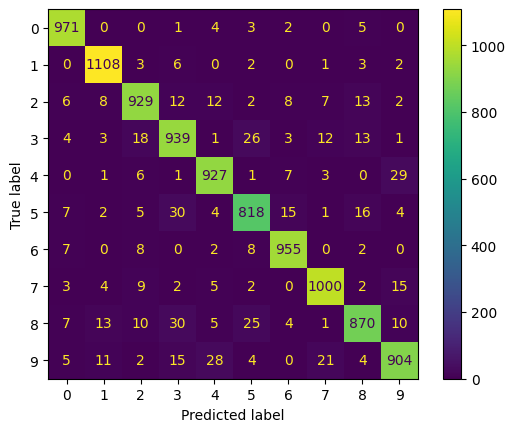

In [7]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)